In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = 'https://raw.githubusercontent.com/leilaff89/house_sales_prediction/main/datasets/house_prices_no_null.csv'

In [3]:
df = pd.read_csv(url)

In [4]:
# apply log to a better distribution 
df['PRICE'] = np.log(df.PRICE)
df['FLOOR_AREA'] = np.log(df.FLOOR_AREA)
df['NEAREST_STN_DIST'] = np.log(df.NEAREST_STN_DIST)
df['NEAREST_SCH_DIST'] = np.log(df.NEAREST_SCH_DIST)

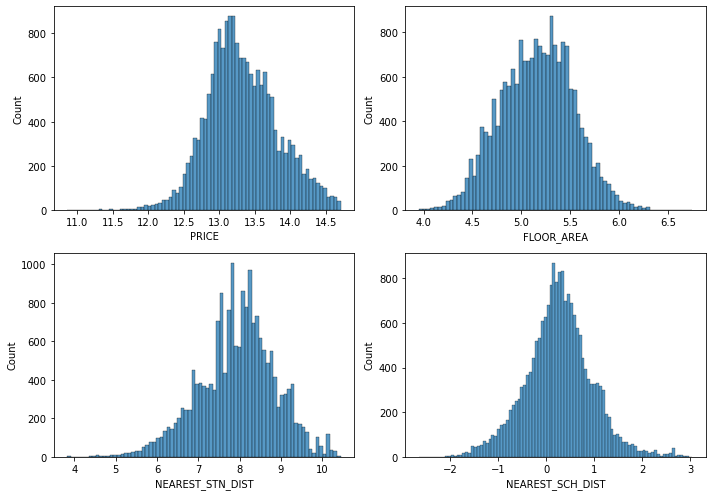

In [5]:
# visualizing 
fig = plt.figure(figsize=(10,7))
fig.add_subplot(2,2,1)
sns.histplot(df['PRICE'])
fig.add_subplot(2,2,2)
sns.histplot(df['FLOOR_AREA'])
fig.add_subplot(2,2,3)
sns.histplot(df['NEAREST_STN_DIST'])
fig.add_subplot(2,2,4)
sns.histplot(df['NEAREST_SCH_DIST'])
plt.tight_layout()

In [6]:
# change SUBURB category for PRICE mean
new_df = df.groupby('SUBURB', as_index=False)['PRICE'].mean()
replace_dict = new_df.set_index('SUBURB').to_dict()['PRICE']
df = df.replace(replace_dict)

In [7]:
df.head()

,ADDRESS,SUBURB,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN,NEAREST_STN_DIST,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH,NEAREST_SCH_DIST,NEAREST_SCH_RANK,MONTH_SOLD,YEAR_SOLD
0,1 Addis Way,13.151488,12.807653,3,2,2.0,351,4.934474,2013,26900,Kwinana Station,8.496990,6167,-32.193470,115.859554,ATWELL COLLEGE,1.709161,129.0,2,2019
1,1 Ainsley Court,12.571507,12.567237,3,1,1.0,719,4.454347,1979,22600,Challis Station,7.549609,6111,-32.120578,115.993579,KELMSCOTT SENIOR HIGH SCHOOL,0.500277,113.0,6,2015
2,1 Arundel Street,13.300859,13.437174,3,2,8.0,552,4.836282,1999,5900,Bayswater Station,6.230481,6053,-31.917880,115.907050,CHISHOLM CATHOLIC COLLEGE,-0.065880,29.0,10,2019
3,1 Ashcott Gate,12.831836,12.814479,3,2,2.0,398,5.062595,2003,36300,Butler Station,7.649693,6036,-31.654280,115.702200,BUTLER COLLEGE,-0.384423,39.0,11,2018
4,1 Ashendon Boulevard,13.167607,13.190022,4,2,4.0,704,5.509388,2002,23100,Cockburn Central Station,8.268732,6164,-32.159590,115.849480,ATWELL COLLEGE,0.797797,129.0,7,2019


In [8]:
df2 = df
# drop columns with low correlation in df2
df2 = df.drop(columns=['ADDRESS','LAND_AREA','POSTCODE','NEAREST_STN','NEAREST_SCH','MONTH_SOLD'])

In [9]:
# get dummies in df
dum = pd.get_dummies(df[['NEAREST_STN','NEAREST_SCH']])
df = df.join(dum)
df = df.drop(columns=['ADDRESS','LAND_AREA','POSTCODE','NEAREST_STN','NEAREST_SCH','MONTH_SOLD'])

In [10]:
df.head()

,SUBURB,PRICE,BEDROOMS,BATHROOMS,GARAGE,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN_DIST,LATITUDE,...,NEAREST_SCH_SWAN CHRISTIAN COLLEGE,NEAREST_SCH_SWAN VALLEY ANGLICAN COMMUNITY SCHOOL,NEAREST_SCH_THORNLIE SENIOR HIGH SCHOOL,NEAREST_SCH_TRANBY COLLEGE,NEAREST_SCH_TRINITY COLLEGE,NEAREST_SCH_URSULA FRAYNE CATHOLIC COLLEGE,NEAREST_SCH_WANNEROO SECONDARY COLLEGE,NEAREST_SCH_WESLEY COLLEGE,NEAREST_SCH_WILLETTON SENIOR HIGH SCHOOL,NEAREST_SCH_WOODVALE SECONDARY COLLEGE
0,13.151488,12.807653,3,2,2.0,4.934474,2013,26900,8.496990,-32.193470,...,0,0,0,0,0,0,0,0,0,0
1,12.571507,12.567237,3,1,1.0,4.454347,1979,22600,7.549609,-32.120578,...,0,0,0,0,0,0,0,0,0,0
2,13.300859,13.437174,3,2,8.0,4.836282,1999,5900,6.230481,-31.917880,...,0,0,0,0,0,0,0,0,0,0
3,12.831836,12.814479,3,2,2.0,5.062595,2003,36300,7.649693,-31.654280,...,0,0,0,0,0,0,0,0,0,0
4,13.167607,13.190022,4,2,4.0,5.509388,2002,23100,8.268732,-32.159590,...,0,0,0,0,0,0,0,0,0,0


In [11]:
df2.head()

,SUBURB,PRICE,BEDROOMS,BATHROOMS,GARAGE,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN_DIST,LATITUDE,LONGITUDE,NEAREST_SCH_DIST,NEAREST_SCH_RANK,YEAR_SOLD
0,13.151488,12.807653,3,2,2.0,4.934474,2013,26900,8.496990,-32.193470,115.859554,1.709161,129.0,2019
1,12.571507,12.567237,3,1,1.0,4.454347,1979,22600,7.549609,-32.120578,115.993579,0.500277,113.0,2015
2,13.300859,13.437174,3,2,8.0,4.836282,1999,5900,6.230481,-31.917880,115.907050,-0.065880,29.0,2019
3,12.831836,12.814479,3,2,2.0,5.062595,2003,36300,7.649693,-31.654280,115.702200,-0.384423,39.0,2018
4,13.167607,13.190022,4,2,4.0,5.509388,2002,23100,8.268732,-32.159590,115.849480,0.797797,129.0,2019


In [ ]:
df.to_csv('house_prices_ml_features_dummies.csv', index=False)

In [ ]:
df2.to_csv('house_prices_ml_features.csv', index=False)